In [1]:
import string
from collections import Counter

from nltk.tokenize import word_tokenize

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm

from src.dataset_utils import load_files
from src.syllable_splitter import split_word

In [2]:
files = load_files('/mnt/d/Projects/masters-thesis/data/transcriptions')

target_files = files[1:6]

In [4]:
# with open('/mnt/d/Projects/masters-thesis/data/single_words.txt', 'w+') as f:
#     for file_path in target_files:
#         sample = pd.read_csv(file_path)
#         sample['split'] = sample['sentence'].apply(word_tokenize)
#         sample['split_transcription'] = sample['transcription'].apply(word_tokenize)

#         words = sample['split'].sum()
#         transcriptions = sample['split_transcription'].sum()
        
#         words = [word for word in words if word not in string.punctuation + '"' + '“' + '—' + '”']
#         transcriptions = [word for word in transcriptions if word not in string.punctuation + '"' + '“' + '—' + '”']

        
#         for word, transcription in zip(words, transcriptions):
#             f.write(f'{word}, {transcription}\n')

In [5]:
!wc -l /mnt/d/Projects/masters-thesis/data/single_words.txt

606102 /mnt/d/Projects/masters-thesis/data/single_words.txt


In [32]:
with open('/mnt/d/Projects/masters-thesis/data/single_words.txt') as fp:
    content = fp.readlines()

In [33]:
content = [item.split(',') for item in content]
words = [word.strip() for word, _ in content]
transcriptions = [transcription.strip() for _, transcription in content]

size = len(content)

In [34]:
word_count = Counter(words)

len(word_count)

39405

In [35]:
for word, count in word_count.most_common(10):
    print(f'{word} & {count} & {count/size*100:.2f}\\% \\\\')
    print('\\hline')

на & 20369 & 3.36\% \\
\hline
да & 20311 & 3.35\% \\
\hline
и & 20048 & 3.31\% \\
\hline
се & 16139 & 2.66\% \\
\hline
в & 10114 & 1.67\% \\
\hline
от & 9666 & 1.59\% \\
\hline
не & 8151 & 1.34\% \\
\hline
си & 7617 & 1.26\% \\
\hline
с & 7160 & 1.18\% \\
\hline
че & 6724 & 1.11\% \\
\hline


In [38]:
word_lenghts = [len(word) for word in words]

word_lengths_counter = Counter(word_lenghts)

TypeError: unsupported operand type(s) for +: 'int' and 'tuple'

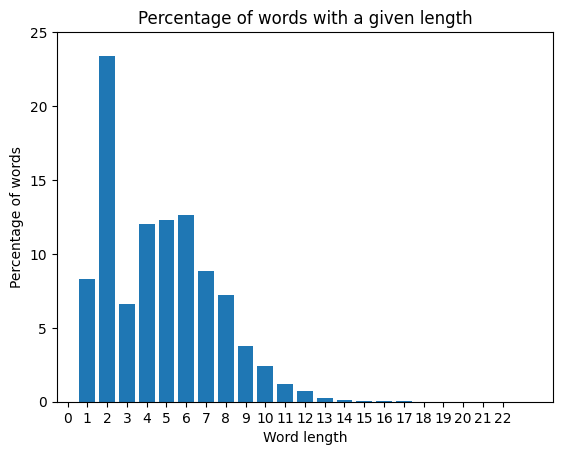

In [72]:
x = np.array(list(word_lengths_counter.keys()))


y = np.array(list(word_lengths_counter.values()))
y = y / size * 100


fig, ax = plt.subplots()


ax.bar(x, y)
ax.set_xticks(np.arange(len(x)))
ax.set_ylim([0, 25])
ax.set_xlabel('Word length')
ax.set_ylabel('Percentage of words')
ax.set_title('Percentage of words with a given length')

plt.show()

In [8]:
sum(word_lenghts) / len(word_lenghts)

4.673389957465905

In [40]:

for length, count in word_lengths_counter.most_common(5):
    print(f'{length} & {count} & {count/size*100:.2f}\\% \\\\')
    print('\\hline')

2 & 141574 & 23.36\% \\
\hline
6 & 76666 & 12.65\% \\
\hline
5 & 74561 & 12.30\% \\
\hline
4 & 72930 & 12.03\% \\
\hline
7 & 53716 & 8.86\% \\
\hline


In [9]:
counts = np.array(list(word_count.values()))

In [10]:
mean = np.mean(counts)
median = np.median(counts)
variance = np.var(counts)
stdev = np.std(counts)
percentiles = np.percentile(counts, [25, 50, 75, 95])

f'{mean=:.3f}, {median=:.3f}, {variance=:.3f}, {stdev=:.3f}, {percentiles=}'

'mean=15.381, median=2.000, variance=58989.763, stdev=242.878, percentiles=array([ 1.,  2.,  5., 31.])'

In [74]:
syllables = [split_word(word) for word in words]

In [75]:
flat_syllables = []
for word in tqdm.tqdm(syllables):
    flat_syllables += word

100%|██████████| 606102/606102 [00:00<00:00, 5077852.43it/s]


In [10]:
syllables_count = Counter(flat_syllables)

In [14]:
len(syllables_count), len(flat_syllables)

(5469, 1222793)

In [12]:
for word, count in syllables_count.most_common(10):
    print(f'{word} & {count} & {count/size*100:.2f}\\% \\\\')
    print('\\hline')

на & 53107 & 8.76\% \\
\hline
то & 34352 & 5.67\% \\
\hline
та & 32000 & 5.28\% \\
\hline
и & 30720 & 5.07\% \\
\hline
да & 28596 & 4.72\% \\
\hline
ни & 23501 & 3.88\% \\
\hline
те & 22548 & 3.72\% \\
\hline
ка & 22094 & 3.65\% \\
\hline
се & 21358 & 3.52\% \\
\hline
е & 20169 & 3.33\% \\
\hline


In [77]:
syllables_length = [len(syllable) for syllable in flat_syllables]

syllables_length_count = Counter(syllables_length)

In [78]:
syllables_length_count

Counter({2: 751809,
         1: 95942,
         3: 289748,
         4: 67749,
         6: 4160,
         5: 12985,
         7: 366,
         9: 6,
         8: 19,
         10: 5,
         11: 2,
         13: 2})

In [83]:
sum(syllables_length) / len(syllables_length)

2.316459940480523

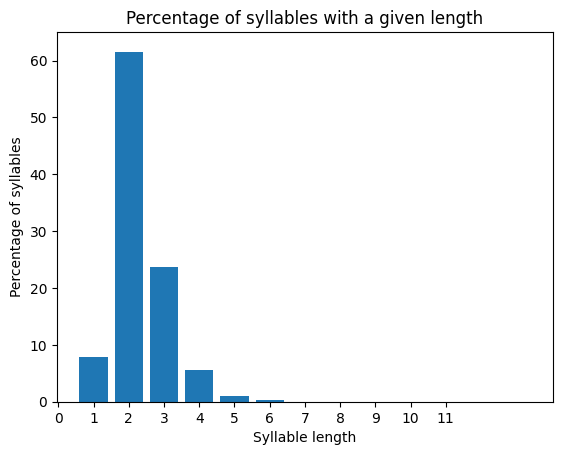

In [82]:
x = np.array(list(syllables_length_count.keys()))


y = np.array(list(syllables_length_count.values()))
y = y / len(flat_syllables) * 100


fig, ax = plt.subplots()


ax.bar(x, y)
ax.set_xticks(np.arange(len(x)))
ax.set_ylim([0, 65])
ax.set_xlabel('Syllable length')
ax.set_ylabel('Percentage of syllables')
ax.set_title('Percentage of syllables with a given length')

plt.show()

In [84]:
syllables_length_count.most_common(2)

[(2, 751809), (3, 289748)]